In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from statistics import mode
from sklearn.model_selection import train_test_split

## Setting up data

In [2]:
irisData = datasets.load_iris()

In [92]:
xVals = irisData['data']
yVals = irisData['target']
distanceArray = []

In [93]:
xTrain, xTest, yTrain, yTest = train_test_split(
    xVals,
    yVals,
    train_size=0.1,
)

## Functions

In [94]:
def getDistance(arr1,arr2):
    return (sum((x-y)**2 for x,y in zip(arr1,arr2))**0.5)

In [95]:
flowerType = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

In [100]:
def predictClass(point,distanceArray,K):
    distanceArray.clear()
    # Calculate distances 
    #   Adds tuple (distance,class) to distance array
    for val in zip(xTrain,yTrain):
        distanceArray.append(
            (getDistance(point,val[0]),val[1])
        )
    # Sort the distance array
    distanceArray.sort(key=lambda tup: tup[0])
    # Grab the first K values of distance array
    distanceArray = distanceArray[:K]
    # Find common class
    classes = [i[1] for i in distanceArray]
    return flowerType[mode(classes)]


## Testing

### K = 5

In [104]:
correctCount = 0
K = 5
for vals in zip(xTest,yTest):
    prediction = predictClass(vals[0],distanceArray,K)
    answer = flowerType[vals[1]]
    if prediction == answer:
        correctCount += 1
print("Accuracy for K = ",K,": ", round((correctCount/len(xTest))*100,2),"%")

Accuracy for K =  5 :  94.07 %


### 1 <= K <= 40

In [114]:
accuracyArr = []

for k in range(1,41):
    K = k
    correctCount = 0
    for vals in zip(xTest,yTest):
        prediction = predictClass(vals[0],distanceArray,K)
        answer = flowerType[vals[1]]
        if prediction == answer:
            correctCount += 1
    accuracyArr.append(round((correctCount/len(xTest))*100,2))

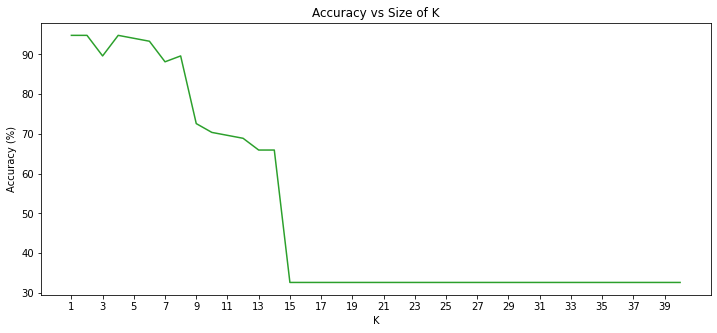

In [124]:
fig, axs = plt.subplots(figsize=(12,5))
axs.plot(range(1,41),accuracyArr,'tab:green')
axs.set_title('Accuracy vs Size of K')
axs.set(xlabel='K')
axs.set(ylabel='Accuracy (%)')
plt.xticks(range(1,41,2))
plt.show()


From the above graph we can see the ideal range of k for this dataset is approximately from 1-9.